Learning Pytorch! Thank you to Daniel Bourke for his 25 hour long course!

In [2]:
import torch
import pickle
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as pyplot

print(torch.__version__)
print(torch.cuda.is_available())

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7facfbb4a230>>
Traceback (most recent call last):
  File "/data/i3home/ssued/venv_ubu22.04/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

Intro to tensors

In [ ]:
scalar = torch.tensor(7)
scalar

tensor(7)

In [ ]:
scalar.ndim

# Get tensor back as Python int

scalar.item()

7

In [ ]:
# Testing dimensions

testten = torch.tensor([[1,2],
                        [4,5],
                        [7,8]])

# First shape number refers to outer square brackets, the second to the second outer, etc.
# Tensors cannot be jagged
testten.shape

torch.Size([3, 2])

TENSOR/MATRIX in UPPER CASE

variables and vectors in lower case

size and shape are same thing in pytorch

In [ ]:
x = torch.arange(1.,10.) # Putting a dot at the end ensures the data type is float
print(x, x.dtype)
x_newdim = x.reshape(1,9)
print(x_newdim) # Notice the new bracket!
print(x.reshape(3,3)) # Reshape must have the total number of elements equal to the original.

tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.]) torch.float32
tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]])
tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])


In [ ]:
z = x.view(1,9) # Changing anything in a view of a tensor, also changes the tensor.
print(z)

z[:,0] = 5

print(z,x)

tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]])
tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]]) tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.])


In [ ]:
x_stackedh = torch.stack([x,x,x,x],dim=0)
print(x_stackedh)

x_stackedv = torch.stack([x,x,x,x],dim=1)
print(x_stackedv)

tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.],
        [5., 2., 3., 4., 5., 6., 7., 8., 9.],
        [5., 2., 3., 4., 5., 6., 7., 8., 9.],
        [5., 2., 3., 4., 5., 6., 7., 8., 9.]])
tensor([[5., 5., 5., 5.],
        [2., 2., 2., 2.],
        [3., 3., 3., 3.],
        [4., 4., 4., 4.],
        [5., 5., 5., 5.],
        [6., 6., 6., 6.],
        [7., 7., 7., 7.],
        [8., 8., 8., 8.],
        [9., 9., 9., 9.]])


In [ ]:
print(x_newdim.shape)

x_squeezed = torch.squeeze(x_newdim)

print(x_squeezed.shape)


torch.Size([1, 9])
torch.Size([9])


In [ ]:
with open('data/event_dict.pkl', 'rb') as file:
    ev_dict = pickle.load(file)

print(ev_dict[0].keys())

event0 = torch.tensor(ev_dict[0]['data'])

event0.device

dict_keys(['mean_SNR', 'bin_time', 'data'])


device(type='cpu')

In [ ]:
x_original = torch.rand(224,224,3)

x_original[0,0,0]

tensor(0.9443)

In [ ]:
import torch
from torch import nn
# First Linear Regression Model

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1), requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1), requires_grad=True)
    def forward(self,x:torch.Tensor):
        return self.weights*x + self.bias
    
model_0 = LinearRegressionModel()

In [ ]:
# Define variables:
X = torch.arange(0, 50, dtype=torch.float32)
weight = 0.7
bias = -1
y = weight*X + bias

# Create train/test sets:
X_train,y_train = X[:40],y[:40]
X_test,y_test = X[40:],y[40:]

model_0.state_dict()

OrderedDict([('weights', tensor([-0.0532])), ('bias', tensor([0.3052]))])

In [ ]:
# Inference mode allows you to look at the model without training it:
# Can also use torch.no_grad(), however inference mode is preferred.
with torch.inference_mode():
    y_pred = model_0(X)
    print(y_pred)
# Inference mode is called a context manager.

tensor([ 0.3052,  0.2520,  0.1987,  0.1455,  0.0922,  0.0390, -0.0143, -0.0675,
        -0.1208, -0.1740, -0.2272, -0.2805, -0.3337, -0.3870, -0.4402, -0.4935,
        -0.5467, -0.6000, -0.6532, -0.7065, -0.7597, -0.8129, -0.8662, -0.9194,
        -0.9727, -1.0259, -1.0792, -1.1324, -1.1857, -1.2389, -1.2922, -1.3454,
        -1.3987, -1.4519, -1.5051, -1.5584, -1.6116, -1.6649, -1.7181, -1.7714,
        -1.8246, -1.8779, -1.9311, -1.9844, -2.0376, -2.0909, -2.1441, -2.1973,
        -2.2506, -2.3038])


In [ ]:
# We can use a loss function to measure the difference between the predicted and actual values.
# * Also called a criterion
# * Also called a cost function

# The mean absolute error is a common loss function for regression problems. In PyTorch, it is implemented as the L1Loss class.
# Setup a loss function:

loss_fn = nn.L1Loss()

# Stochastic Gradient Descent is a common optimizer for training deep learning models. In PyTorch, it is implemented as the SGD class.
# Setup an optimizer:

optimizer = torch.optim.SGD(model_0.parameters(), lr=0.001) # lr is the learning rate.

In [ ]:
# Training loop:

# An epoch is one loop through the data.
epochs = 200

# For storing model performance:
epoch_count = []
loss_values = []
test_loss_values = []

# Step 0: Loop through the data

for epoch in range(epochs):
    # Set the model to training mode
    model_0.train() # 

    # Step 1: Forward pass
    y_pred = model_0(X_train)

    # Step 2: Calculate loss

    loss = loss_fn(y_pred, y_train)

    # Step 3: Zero gradients. We need to do this after optimizer.step() because PyTorch accumulates gradients on subsequent backward passes.
    optimizer.zero_grad()

    # Step 4: Perform backpropagation on the loss with respect to the parameters of the model.
    loss.backward()

    # Step 5: Step the optimizer (perform gradient descent)
    optimizer.step()

    # Testing:
    model_0.eval()
    with torch.inference_mode():
        # Step 1: Forward pass
        test_pred = model_0(X_test)
        # Step 2: Calculate loss
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f'Epoch: {epoch}, Training Loss: {loss.item()}, Test Loss: {test_loss.item()}')


Epoch: 0, Training Loss: 13.475939750671387, Test Loss: 31.347808837890625
Epoch: 10, Training Loss: 9.702560424804688, Test Loss: 22.7060546875
Epoch: 20, Training Loss: 5.971149444580078, Test Loss: 14.1137056350708
Epoch: 30, Training Loss: 2.4112563133239746, Test Loss: 5.753952980041504
Epoch: 40, Training Loss: 0.5622345805168152, Test Loss: 0.8288282155990601
Epoch: 50, Training Loss: 0.5595962405204773, Test Loss: 0.8152357339859009
Epoch: 60, Training Loss: 0.5580260753631592, Test Loss: 0.8016435503959656
Epoch: 70, Training Loss: 0.5564559698104858, Test Loss: 0.7880512475967407
Epoch: 80, Training Loss: 0.5545551180839539, Test Loss: 0.7744592428207397
Epoch: 90, Training Loss: 0.5526350736618042, Test Loss: 0.7608661651611328
Epoch: 100, Training Loss: 0.5507152676582336, Test Loss: 0.7472742199897766
Epoch: 110, Training Loss: 0.5490328073501587, Test Loss: 0.7960309982299805
Epoch: 120, Training Loss: 0.5474625825881958, Test Loss: 0.7824388742446899
Epoch: 130, Training

In [ ]:
loss_values

[tensor(13.4759, grad_fn=<MeanBackward0>),
 tensor(9.7026, grad_fn=<MeanBackward0>),
 tensor(5.9711, grad_fn=<MeanBackward0>),
 tensor(2.4113, grad_fn=<MeanBackward0>),
 tensor(0.5622, grad_fn=<MeanBackward0>),
 tensor(0.5596, grad_fn=<MeanBackward0>),
 tensor(0.5580, grad_fn=<MeanBackward0>),
 tensor(0.5565, grad_fn=<MeanBackward0>),
 tensor(0.5546, grad_fn=<MeanBackward0>),
 tensor(0.5526, grad_fn=<MeanBackward0>),
 tensor(0.5507, grad_fn=<MeanBackward0>),
 tensor(0.5490, grad_fn=<MeanBackward0>),
 tensor(0.5475, grad_fn=<MeanBackward0>),
 tensor(0.5458, grad_fn=<MeanBackward0>),
 tensor(0.5439, grad_fn=<MeanBackward0>),
 tensor(0.5419, grad_fn=<MeanBackward0>),
 tensor(0.5400, grad_fn=<MeanBackward0>),
 tensor(0.5385, grad_fn=<MeanBackward0>),
 tensor(0.5369, grad_fn=<MeanBackward0>),
 tensor(0.5351, grad_fn=<MeanBackward0>)]

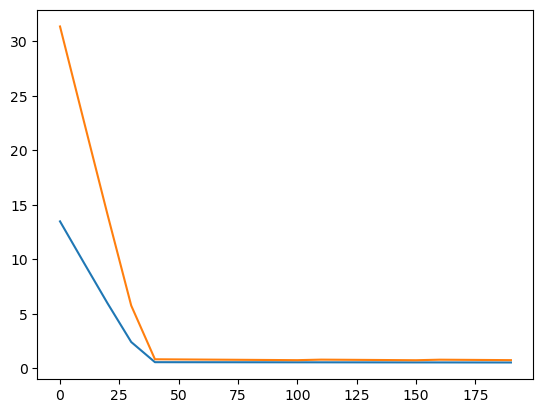

In [ ]:
import matplotlib.pyplot as plt
list(model_0.parameters())

plt.plot(epoch_count, torch.tensor(loss_values).numpy(), label='Training Loss')
plt.plot(epoch_count, torch.tensor(test_loss_values).numpy(), label='Test Loss')

In [ ]:
# For saving the model:
from pathlib import Path # Interesting python library to handle file paths.

MODEL_PATH = Path('models')
MODEL_PATH.mkdir(exist_ok=True,parents=True)

MODEL_NAME = '01_linear_regression_model.pth'
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

torch.save(model_0.state_dict(), MODEL_SAVE_PATH)

In [ ]:
# To load model:

model_0b = LinearRegressionModel()
model_0b.load_state_dict(torch.load(MODEL_SAVE_PATH))

/tmp/ipykernel_31643/3027852325.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_0b.load_state_dict(torch.load(MODEL_SAVE_PATH))


<All keys matched successfully>

### Putting it all together!

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

torch.cuda.is_available() # ISSUE!

False

In [ ]:
# Create weight and bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze, errors will happen later on (shapes within linear layers)
y = weight * X + bias 
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

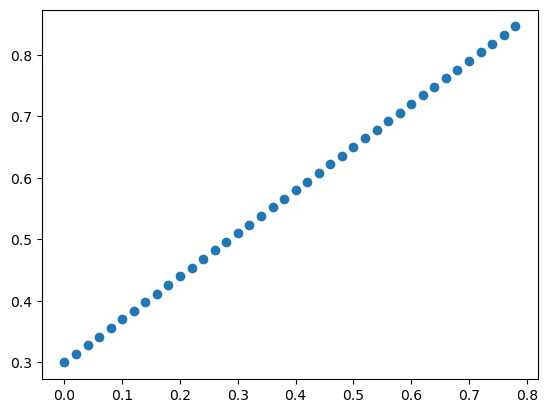

In [ ]:
# Plot the data

plt.scatter(X_train, y_train, label='Training Data')
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
# Build linear model:
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters
        self.linear_layer = nn.Linear(in_features=1, 
                                      out_features=1)
    
    # Define the forward computation (input data x flows through nn.Linear())
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

# Set the manual seed
torch.manual_seed(42)
model_v2 = LinearRegressionModelV2()

model_v2.state_dict() 

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [ ]:
next(model_v2.parameters()).device
model_v2.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
# Create loss function
loss_fn = nn.L1Loss()

# Create optimizer
optimizer = torch.optim.SGD(params=model_v2.parameters(), # optimize newly created model's parameters
                            lr=0.01)

In [ ]:
torch.manual_seed(42)

# Set the number of epochs 
epochs = 200

# Put data on the available device
# Without this, error will happen (not all model/data on device)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    ### Training
    model_v2.train() # train mode is on by default after construction

    # 1. Forward pass
    y_pred = model_v2(X_train)

    # 2. Calculate loss
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad optimizer
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Step the optimizer
    optimizer.step()

    ### Testing
    model_v2.eval() # put the model in evaluation mode for testing (inference)
    # 1. Forward pass
    with torch.inference_mode():
        test_pred = model_v2(X_test)
    
        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Train loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 10 | Train loss: 0.4399680495262146 | Test loss: 0.4392663538455963
Epoch: 20 | Train loss: 0.3247582018375397 | Test loss: 0.30455657839775085
Epoch: 30 | Train loss: 0.20954827964305878 | Test loss: 0.16984674334526062
Epoch: 40 | Train loss: 0.09433844685554504 | Test loss: 0.03513689711689949
Epoch: 50 | Train loss: 0.023886386305093765 | Test loss: 0.04784906655550003
Epoch: 60 | Train loss: 0.0199567973613739 | Test loss: 0.04580312222242355
Epoch: 70 | Train loss: 0.016517987474799156 | Test loss: 0.0375305712223053
Epoch: 80 | Train loss: 0.013089170679450035 | Test loss: 0.029944902285933495
Epoch: 90 | Train loss: 0.009653178043663502 | Test loss: 0.02167237363755703
Epoch: 100 | Train loss: 0.006215679459273815 | Test loss: 0.014086711220443249
Epoch: 110 | Train loss: 0.002787243574857712 | Test loss: 0.005814164876937866
Epoch: 120 | Train loss: 0.0012645035749301314 | Test loss: 0.01380180753

In [ ]:
model_v2.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

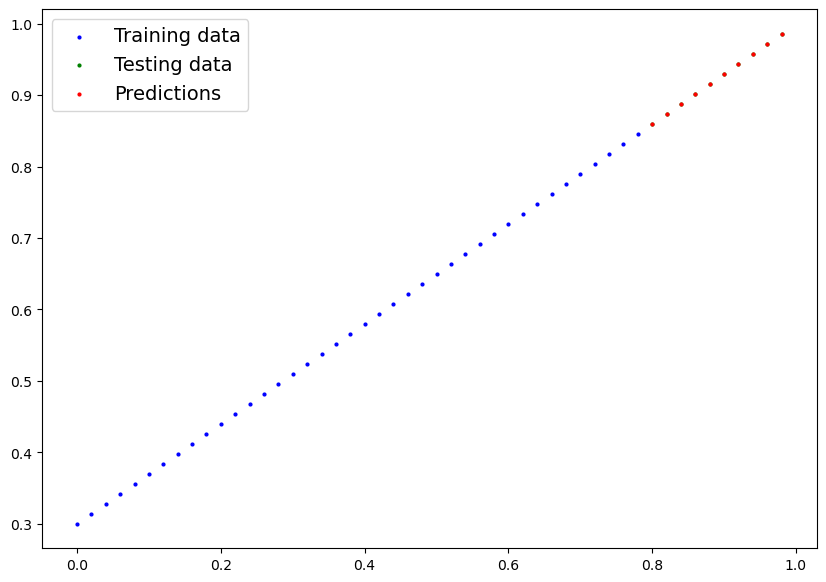

In [ ]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

with torch.inference_mode():
  y_preds = model_v2(X_test)

plot_predictions(predictions=y_preds.cpu())

In [ ]:
MODEL_NAME = '01_linear_regression_modelv2.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
torch.save(obj=model_v2.state_dict(),f=MODEL_SAVE_PATH)

loaded_model_V2 = LinearRegressionModelV2()
loaded_model_V2.load_state_dict(torch.load(MODEL_SAVE_PATH))

loaded_model_V2.to(device)

# Evaluate:

loaded_model_V2.eval()
with torch.inference_mode():
    loaded_model_V2_preds = loaded_model_V2(X_test)
y_preds == loaded_model_V2_preds

/tmp/ipykernel_31643/482805765.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_V2.load_state_dict(torch.load(MODEL_SAVE_PATH))


tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

### Classification with PyTorch

In [ ]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

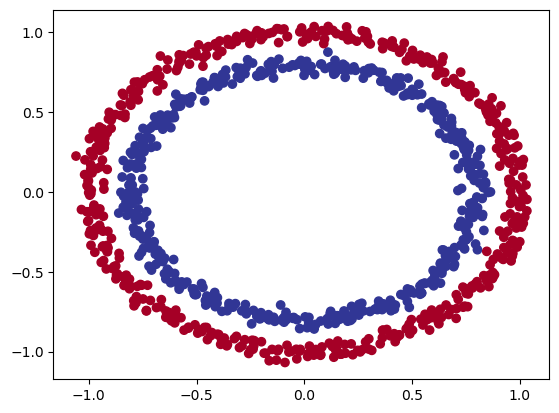

In [ ]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0], 
            y=X[:, 1], 
            c=y, 
            cmap=plt.cm.RdYlBu)

In [ ]:
import torch

X = torch.from_numpy(X).float()
y = torch.from_numpy(y).float()

X[:10], y[:10]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967],
         [-0.4796,  0.6764],
         [-0.0136,  0.8033],
         [ 0.7715,  0.1478],
         [-0.1693, -0.7935],
         [-0.1215,  1.0215]]),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]))

In [ ]:
# Useful train test split function from sklearn!

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [ ]:
# Standard PyTorch imports
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
# 1. Construct a model class that subclasses nn.Module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create 2 nn.Linear layers capable of handling X and y input and output shapes
        self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features (X), produces 5 features
        self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features, produces 1 feature (y)
    
    # 3. Define a forward method containing the forward pass computation
    def forward(self, x):
        # Return the output of layer_2, a single feature, the same shape as y
        return self.layer_2(self.layer_1(x)) # computation goes through layer_1 first then the output of layer_1 goes through layer_2

# 4. Create an instance of the model and send it to target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
# Replicate CircleModelV0 with nn.Sequential
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5), # Multiples of 8 improve performance!
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

# YOU CAN ALSO DO THIS!! But only for simple, sequential models.
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386],
                      [-0.6007,  0.5459]])),
             ('0.bias', tensor([ 0.1177, -0.2296,  0.4370,  0.1102,  0.5713])),
             ('1.weight',
              tensor([[ 0.0489, -0.1410,  0.1202, -0.1213,  0.1882]])),
             ('1.bias', tensor([0.3993]))])

In [ ]:
# Untrained predictions
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))
    print(f"length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
    print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
    print(f"\nFirst 10 predictions: \n{torch.round(untrained_preds[:10])}") # Not good!
    print(f"\nFirst 10 labels: \n{y_test[:10]}")

length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions: 
tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]])

First 10 labels: 
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [ ]:
# Create a loss function
# loss_fn = nn.BCELoss() # BCELoss = no sigmoid built-in
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid built-in

# Create an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), 
                            lr=0.1)

# Calculate accuracy:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # .item() will convert the 0-rank tensor into a integer.
    acc = (correct/len(y_pred)) * 100
    return acc

In [ ]:
# The model will output logits, which we will then normalize with Sigmoid or Softmax to obtain prediction labels from 0 to 1
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))[:5]

print(y_logits[:5])

y_sigmoid = torch.sigmoid(y_logits) # Sigmoid function converts these to probabilities!

print(y_sigmoid)

y_pred_probs = torch.round(y_sigmoid)

print(y_pred_probs.squeeze())

tensor([[0.6114],
        [0.6168],
        [0.5807],
        [0.6201],
        [0.5544]])
tensor([[0.6483],
        [0.6495],
        [0.6412],
        [0.6502],
        [0.6352]])
tensor([1., 1., 1., 1., 1.])


In [ ]:
# Train the model!

torch.manual_seed(42)

# Set the number of epochs
EPOCHS = 100

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(EPOCHS):
    model_0.train()

    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    loss = loss_fn(y_logits,y_train) # y_logits because loss_fn is BCEwithlogitsloss!

    acc = accuracy_fn(y_true=y_train,y_pred=y_pred)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    # Testing

    model_0.eval()
    with torch.inference_mode():
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits,y_test)

        test_acc = accuracy_fn(y_test,test_pred)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch}, Loss {loss:.5f}, Acc: {acc:.2f}% Test loss: {test_loss:.5f}, Test acc:{test_acc:.2f}%")

# This is not good!

Epoch: 0, Loss 0.73502, Acc: 50.00% Test loss: 0.73273, Test acc:50.00%
Epoch: 10, Loss 0.71197, Acc: 50.00% Test loss: 0.71086, Test acc:50.00%
Epoch: 20, Loss 0.70210, Acc: 50.00% Test loss: 0.70152, Test acc:50.00%
Epoch: 30, Loss 0.69767, Acc: 50.00% Test loss: 0.69740, Test acc:50.00%
Epoch: 40, Loss 0.69556, Acc: 50.00% Test loss: 0.69551, Test acc:50.00%
Epoch: 50, Loss 0.69450, Acc: 50.00% Test loss: 0.69463, Test acc:50.00%
Epoch: 60, Loss 0.69393, Acc: 57.25% Test loss: 0.69421, Test acc:56.50%
Epoch: 70, Loss 0.69360, Acc: 56.38% Test loss: 0.69401, Test acc:52.50%
Epoch: 80, Loss 0.69339, Acc: 53.37% Test loss: 0.69392, Test acc:53.00%
Epoch: 90, Loss 0.69326, Acc: 52.88% Test loss: 0.69389, Test acc:51.00%


In [ ]:
import numpy as np
# Lets visualize some predictions

def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.

    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())


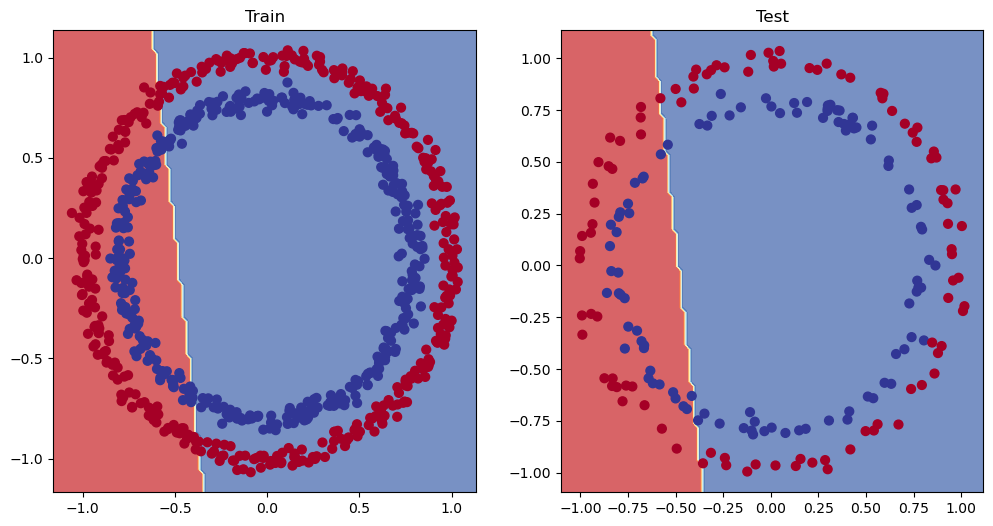

In [ ]:
# Plot the decision boundary
plt.figure(figsize= (12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

tensor([[ 0.7542,  0.2315],
        [-0.7562,  0.1533],
        [-0.8154,  0.1733],
        ...,
        [-0.1369, -0.8100],
        [ 0.6704, -0.7675],
        [ 0.2811,  0.9638]])


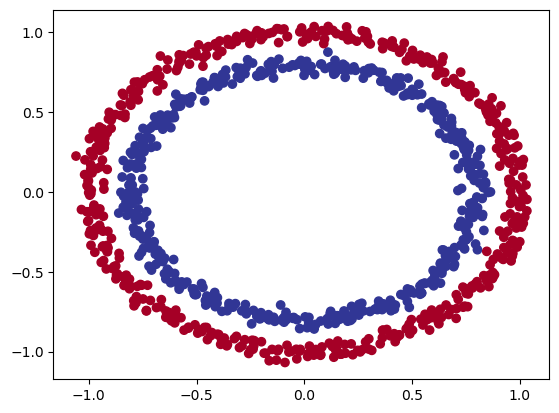

In [ ]:
# Clearly there is a problem here, we need non-linear functions!

# We can add more layers
# Add more hidden units: Linear(in_features=2, out_features=256)
# Fit for longer
# Changing the activation functions
# Change the learning rate
# Change the loss function

# Spoiler: We will change the activation functions to include non-linearities!

import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)


X.shape
X_squeezed = torch.from_numpy(X).float().squeeze()
print(X_squeezed)

In [ ]:
# Convert data to tensors and then to train and test splits
import torch
from sklearn.model_selection import train_test_split

X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

# NOTE! from_numpy shares the memory of the original numpy array, so changes in the tensor will affect the numpy array!

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [ ]:
with torch.inference_mode():
    y_out = model_0(X_train)

y_out[:5].squeeze()

tensor([ 0.0489,  0.0463, -0.0242, -0.0229,  0.0186])

In [ ]:
# Build a model with non-linear activation functions
from torch import nn

class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2,out_features=10)
        self.layer_2 = nn.Linear(in_features=10,out_features=10)
        self.layer_3 = nn.Linear(in_features=10,out_features=1)
        self.relu = nn.ReLU()

    def forward(self, x):
        return self.layer_3(self.relu(self.layer_2(self.layer_1(x))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(),lr=0.1)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Loop through data
epochs = 1000

for epoch in range(epochs):
    model_3.train()

    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    loss = loss_fn(y_logits,y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    model_3.eval()
    with torch.inference_mode():
        test_logits = model_3(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true = y_test,
                               y_pred = test_pred)
        
    if epoch % 100 == 0:
        print(f"Epoch: {epoch}, Loss: {loss:.5f}, Acc: {acc:.2f}%, Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


# QUESTIONS: 
# WHY DO WE SQUEEZE? I believe model outputs are 2D tensors, because model inputs are 2D tensors.
# WHY LOSS WITH LOGITS? The fact that we use logits comes from our loss function. BCEWithLogitsLoss is used for binary classification problems.

Epoch: 0, Loss: 0.69833, Acc: 50.00%, Test loss: 0.69863, Test acc: 49.00%
Epoch: 100, Loss: 0.69289, Acc: 50.88%, Test loss: 0.69411, Test acc: 47.00%


Epoch: 200, Loss: 0.69015, Acc: 53.37%, Test loss: 0.69141, Test acc: 50.00%
Epoch: 300, Loss: 0.68762, Acc: 56.62%, Test loss: 0.68828, Test acc: 55.00%
Epoch: 400, Loss: 0.68469, Acc: 60.00%, Test loss: 0.68469, Test acc: 61.00%
Epoch: 500, Loss: 0.67985, Acc: 56.00%, Test loss: 0.67890, Test acc: 60.50%
Epoch: 600, Loss: 0.67280, Acc: 56.00%, Test loss: 0.67176, Test acc: 60.50%
Epoch: 700, Loss: 0.66304, Acc: 64.50%, Test loss: 0.66452, Test acc: 65.00%
Epoch: 800, Loss: 0.64710, Acc: 74.12%, Test loss: 0.65300, Test acc: 71.50%
Epoch: 900, Loss: 0.62182, Acc: 81.62%, Test loss: 0.63241, Test acc: 78.00%


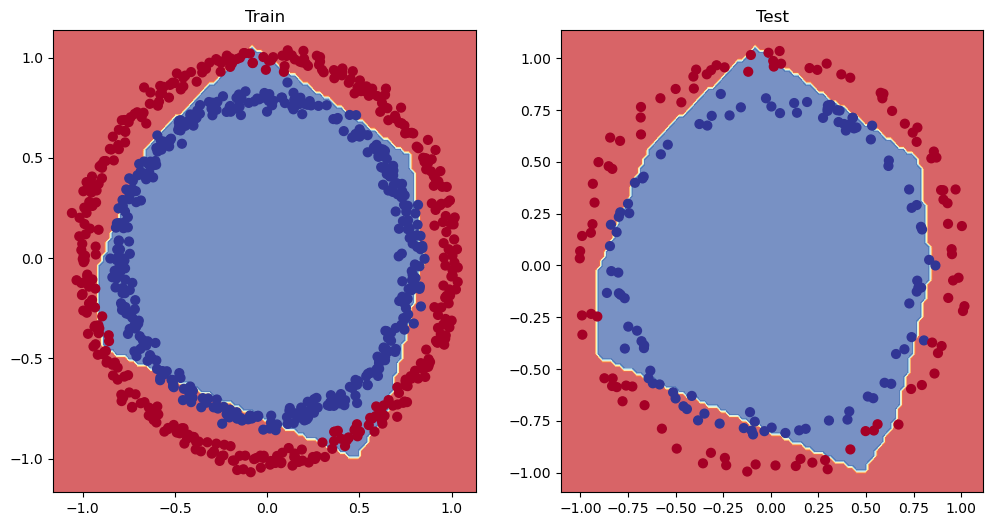

In [ ]:
# Plot the decision boundary
plt.figure(figsize= (12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

### Multiclass Clasification model

In [22]:
# Device agnostic code
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [23]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels 
    cluster_std=1.5, # give the clusters a little shake up (try changing this to 1.0, the default)
    random_state=RANDOM_SEED
)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

# 3. Split into train and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

torch.unique(y_blob_train)

ModuleNotFoundError: No module named 'sklearn'

In [24]:
from torch import nn

class BlobModel(nn.Module): # Check out Python-style guide
    def __init__(self, input_features, output_features, hidden_units=8):
        """initializes multi-class classification model
        
        Args:
            input_features (int): Number of input features
            output_features (int): Number of output features
            hidden_units (int): Number of hidden units between layers, default 8

        Returns:

        Example:
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features)
        )

    def forward(self, x):
            return self.linear_layer_stack(x)
        
model_4 = BlobModel(input_features=2,output_features=4,hidden_units=8).to(device)
        

In [25]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_4.parameters(),lr=0.1)

# Taking a look at the logits
with torch.inference_mode():
    y_logits = model_4(X_blob_train)

print(y_logits)

NameError: name 'X_blob_train' is not defined

In [ ]:
# First set seeds:

torch.manual_seed(42)
torch.cuda.manual_seed(42)

EPOCHS = 100

# Put data on target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
x_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(EPOCHS):
    model_4.train()
    y_logits = model_4(X_blob_train)
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

    loss = loss_fn(y_logits, y_blob_train)
    acc = accuracy_fn(y_true=y_blob_train,y_pred=y_pred)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Test
    model_4.eval() # Turns off dropout layers and BatchNorm
    with torch.inference_mode():
        test_logits = model_4(X_blob_test)
        test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)

        test_loss = loss_fn(test_logits, y_blob_test)
        acc = accuracy_fn(y_true=y_blob_test,y_pred=test_pred)

    # Print:
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test loss: {test_loss:.4f}, Test acc: {test_acc:.2f}%")

    





Epoch: 0 | Loss: 1.1950, Acc: 78.00% | Test loss: 1.0250, Test acc: 86.00%
Epoch: 10 | Loss: 0.6411, Acc: 79.50% | Test loss: 0.5384, Test acc: 86.00%
Epoch: 20 | Loss: 0.4902, Acc: 79.00% | Test loss: 0.4069, Test acc: 86.00%
Epoch: 30 | Loss: 0.4015, Acc: 84.50% | Test loss: 0.3310, Test acc: 86.00%
Epoch: 40 | Loss: 0.3324, Acc: 90.00% | Test loss: 0.2731, Test acc: 86.00%
Epoch: 50 | Loss: 0.2534, Acc: 98.00% | Test loss: 0.2048, Test acc: 86.00%
Epoch: 60 | Loss: 0.1541, Acc: 99.00% | Test loss: 0.1229, Test acc: 86.00%
Epoch: 70 | Loss: 0.0925, Acc: 99.00% | Test loss: 0.0741, Test acc: 86.00%
Epoch: 80 | Loss: 0.0664, Acc: 99.00% | Test loss: 0.0532, Test acc: 86.00%
Epoch: 90 | Loss: 0.0540, Acc: 99.00% | Test loss: 0.0432, Test acc: 86.00%


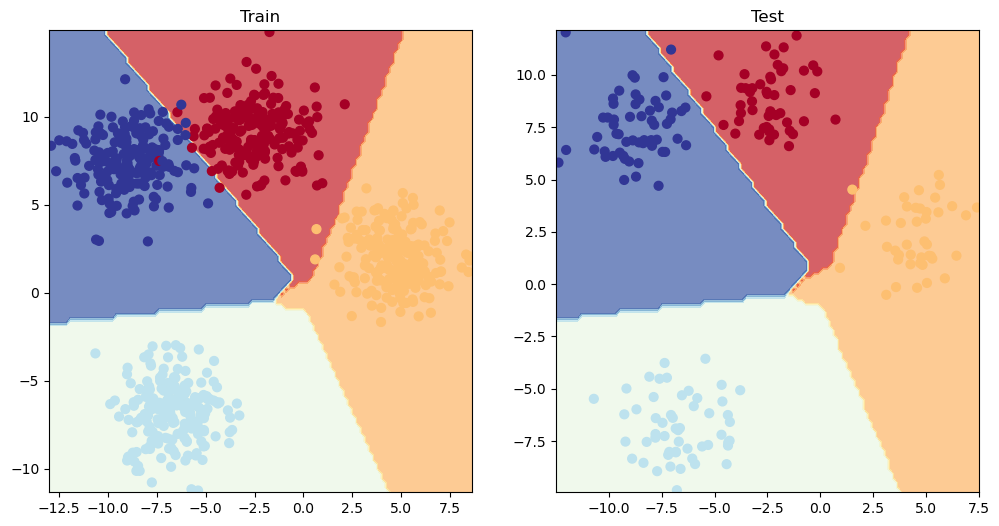

In [ ]:
# Plot the decision boundary
plt.figure(figsize= (12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

In [26]:
# TORCH METRICS CAN HELP YOU WITH RESULTS.

from torchmetrics import Accuracy

torchmetric_accuracy = Accuracy().to(device)

torchmetric_accuracy(y_preds,y_blob_train)

ModuleNotFoundError: No module named 'torchmetrics'

In [ ]:
import pickle
import torch

with open('/data/i3home/ssued/RNOGCnn/CNN_steps/eventdata/eventbatch.pkl','rb') as file:
    evb = pickle.load(file)

test_data = torch.tensor(evb[0]['data']).unsqueeze(0)
test_data.shape

# PyTorch generally accepts NCHW (channels first) as the default for many operators. Which is my format right now!

## Computer vision

# ! Accuracy Function

In [ ]:
def accuracy_fn(y_true, y_pred):
    """Calculates accuracy between truth labels and predictions.

    Args:
        y_true (torch.Tensor): Truth labels for predictions.
        y_pred (torch.Tensor): Predictions to be compared to predictions.

    Returns:
        [torch.float]: Accuracy value between y_true and y_pred, e.g. 78.45
    """
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [ ]:
import torch
from torch import nn

import torchvision
from torchvision import transforms
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.5.1+cu124
0.20.1+cu124


/data/i3home/ssued/venv_ubu22.04/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [ ]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="data", # where to download data to?
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root="data",
    train=False, # get test data
    download=True,
    transform=ToTensor()
)

In [ ]:
# How many samples are there? 
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [ ]:
# See classes
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

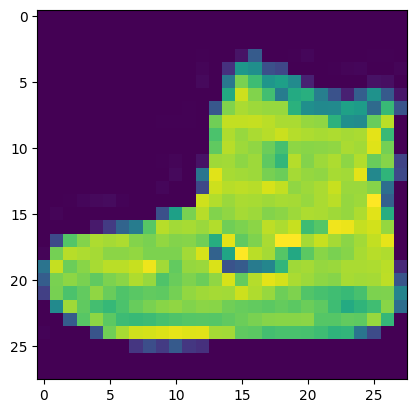

In [ ]:
import matplotlib.pyplot as plt


image, label = train_data[0]

plt.imshow(image.squeeze())

### DATA LOADER!

In [ ]:
# Data Loaders turn data into Python iterables
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False) # Not optimal to shuffle test

In [ ]:
# Show a sample batch. Not a single item, this is a batch!
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])


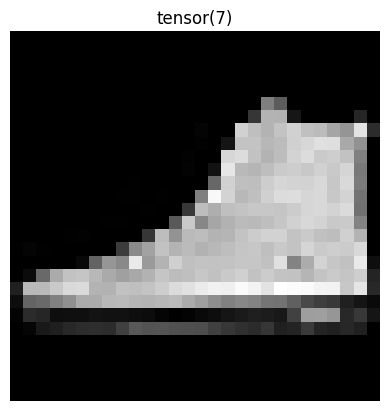

In [ ]:
torch.manual_seed(42)
random_idx = torch.randint(0,len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(label)
plt.axis(False)
print(f"Image size: {img.shape}")

In [ ]:
# Create a flatten layer

flatten_model = nn.Flatten()

X = train_features_batch[0]

print(X.shape)

output = flatten_model(X).squeeze()

print(output.shape)

torch.Size([1, 28, 28])
torch.Size([784])


In [ ]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                       out_features=hidden_units),
            nn.Linear(in_features=hidden_units,
            out_features=output_shape),
        )
    def forward(self, x):
        return self.layer_stack(x)

In [ ]:
model_0 = FashionMNISTModelV0(
    input_shape=784,
    hidden_units=10,
    output_shape=10
) 

model_0.to("cpu")

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x).shape

torch.Size([1, 10])

In [ ]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0296, -0.0084,  0.0328,  ...,  0.0093,  0.0135, -0.0188],
                      [-0.0354,  0.0187,  0.0085,  ..., -0.0001,  0.0115, -0.0008],
                      [ 0.0017,  0.0045,  0.0133,  ..., -0.0188,  0.0059,  0.0100],
                      ...,
                      [ 0.0273, -0.0344,  0.0127,  ...,  0.0283, -0.0011, -0.0230],
                      [ 0.0257,  0.0291,  0.0243,  ..., -0.0087,  0.0001,  0.0176],
                      [-0.0147,  0.0053, -0.0194,  ..., -0.0221,  0.0205, -0.0093]])),
             ('layer_stack.1.bias',
              tensor([ 0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,  0.0018,
                       0.0163,  0.0069])),
             ('layer_stack.2.weight',
              tensor([[-0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,  0.2019,
                        0.2847, -0.1495],
                      [ 0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.3130, -0.

In [ ]:
# Setup loss/optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.1 )

In [ ]:
from timeit import default_timer as timer

def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
    """Prints time difference"""
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")

In [ ]:
start_time = timer()
print("hello")
end_time = timer()

print_train_time(start_time, end_time, device='cpu')

hello
Train time on cpu: 0.000 seconds


### Creating a training loop and training model on batches of data:

1. Loop through epochs
2. Loop through training batches, perform training steps, calculate loss per batch
3. Loop through testing batches, perform testing steps, calculate test loss per batch
4. Print out what's happening
5. Time it all

In [ ]:
# for batch, (X, y) in enumerate(train_dataloader):
#     if batch % 400 == 0:
#         print(batch)

train_dataloader.batch_size

32

In [ ]:
from tqdm.auto import tqdm # .auto recognizes what framework we are using for python which improves compatibility

torch.manual_seed(42)
train_time_start_on_cpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
    print(f'Epoch: {epoch} \n------')

    train_loss = 0

    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        
        y_pred = model_0(X)

        loss = loss_fn(y_pred, y)
        train_loss += loss

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        # Parameters are being updated once per batch!

        if batch % 400 == 0:
            print(f'Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples')

    train_loss /= len(train_dataloader) # Divide by number of batches

    # TESTING

    test_loss, test_acc = 0, 0

    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            test_pred = model_0(X_test)

            test_loss += loss_fn(test_pred, y_test)
            #test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

        test_loss /= len(test_dataloader)
        #test_acc /= len(test_dataloader)

        print(f'\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}')

        train_time_end_on_cpu = timer()
        total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                                    end=train_time_end_on_cpu,
                                                    device=str(next(model_0.parameters()).device))

/data/i3home/ssued/venv_ubu22.04/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 
------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 33%|███▎      | 1/3 [00:10<00:20, 10.49s/it]


Train loss: 0.5948 | Test loss: 0.5164
Train time on cpu: 10.498 seconds
Epoch: 1 
------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 67%|██████▋   | 2/3 [00:20<00:10, 10.37s/it]


Train loss: 0.4795 | Test loss: 0.4814
Train time on cpu: 20.790 seconds
Epoch: 2 
------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


100%|██████████| 3/3 [00:31<00:00, 10.38s/it]


Train loss: 0.4570 | Test loss: 0.4777
Train time on cpu: 31.134 seconds


# ! Functionize Model Evaluation:

In [ ]:
def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               accuracy_fn):
    """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Make predictions with the model
            y_pred = model(X)
            
            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, 
                                y_pred=y_pred.argmax(dim=1)) # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)
        
        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
        
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

NameError: name 'device' is not defined

In [ ]:
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)

model_0_results

100%|██████████| 313/313 [00:01<00:00, 237.35it/s]


{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4777321219444275,
 'model_acc': 83.49640575079871}

### Lets add some non-linearities: (And make this code_agnostic)

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [ ]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # Flatten inputs into a single vector
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )

    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)

model_1 = FashionMNISTModelV1(input_shape=784, hidden_units=10, output_shape=10)

In [ ]:
loss_fn = nn.CrossEntropyLoss() # Measure how wrong our model is. (Cross entropy loss for multiple categorical data)
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1) # Updates model parameters to reduce loss

# ! Trainstep/Teststep functions!

In [ ]:
# def train_step(model: torch.nn.Module,
#                data_loader: torch.utils.data.DataLoader,
#                loss_fn: torch.nn.Module,
#                optimizer: torch.optim.Optimizer,
#                accuracy_fn,
#                device: torch.device = device):
#     train_loss, train_acc = 0, 0
#     model.to(device)
#     for batch, (X, y) in enumerate(data_loader):
#         # Send data to GPU
#         X, y = X.to(device), y.to(device)

#         # 1. Forward pass
#         y_pred = model(X)

#         # 2. Calculate loss
#         loss = loss_fn(y_pred, y)
#         train_loss += loss
#         train_acc += accuracy_fn(y_true=y,
#                                  y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

#         # 3. Optimizer zero grad
#         optimizer.zero_grad()

#         # 4. Loss backward
#         loss.backward()

#         # 5. Optimizer step
#         optimizer.step()

#     # Calculate loss and accuracy per epoch and print out what's happening
#     train_loss /= len(data_loader)
#     train_acc /= len(data_loader)
#     print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def train_step(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer, 
               accuracy_fn, 
               device: torch.device = device):
    """Performs training step with model trying to learn on data_loader."""
    train_loss, train_acc = 0, 0
    model.to(device)

    # Put model into training mode
    model.train()

    # Loop through batches
    for batch, (X, y) in enumerate(data_loader):
        # Put data on target device
        X, y = X.to(device), y.to(device)
        # 1. Forward Pass (outputs raw logits)
        y_pred = model(X)
        # 2. Calculate the loss and accuracy per batch
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
        # 3. Optimizer zero grad
        optimizer.zero_grad()
        # 4. Loss backward
        loss.backward()
        # 5. Optimizer step (update model's parameters once per batch)
        optimizer.step()
    
    # Divide total train acc and loss by length of train dataloader
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)

    print(f'Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%')

def test_step(model: torch.nn.Module, data_loader: torch.utils.data.DataLoader, loss_fn: torch.nn.Module, optimizer: torch.optim.Optimizer, accuracy_fn, device: torch.device = device):
    """Performs testing step with model trying to learn on data_loader."""
    test_loss, test_acc = 0, 0
    model.to(device)

    # Put the model in eval mode
    model.eval()

    # Turn on inference mode context manager
    with torch.inference_mode():
        for X, y in data_loader:
            # Put data on target device
            X, y = X.to(device), y.to(device)
            # 1. Forward pass
            test_pred = model(X)
            # 2. Calculate the loss/acc
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1)) # go from logits to prediction labels
        
        # Adjust metric and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f'Test loss: {test_loss:.5f} | Train acc: {test_acc:.2f}%')

In [ ]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader, 
        model=model_1, 
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn
    )
    test_step(data_loader=test_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn
    )

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

NameError: name 'torch' is not defined